In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Carga de datos
url = 'https://raw.githubusercontent.com/lorey/list-of-countries/master/csv/countries.csv'
df = pd.read_csv(url, sep= ";")
print(df.head(5))

  alpha_2 alpha_3      area           capital continent currency_code  \
0      AD     AND     468.0  Andorra la Vella        EU           EUR   
1      AE     ARE   82880.0         Abu Dhabi        AS           AED   
2      AF     AFG  647500.0             Kabul        AS           AFN   
3      AG     ATG     443.0        St. John's       NaN           XCD   
4      AI     AIA     102.0        The Valley       NaN           XCD   

  currency_name eqivalent_fips_code fips  geoname_id          languages  \
0          Euro                 NaN   AN     3041565                 ca   
1        Dirham                 NaN   AE      290557  ar-AE,fa,en,hi,ur   
2       Afghani                 NaN   AF     1149361  fa-AF,ps,uz-AF,tk   
3        Dollar                 NaN   AC     3576396              en-AG   
4        Dollar                 NaN   AV     3573511              en-AI   

                   name         neighbours  numeric   phone  population  \
0               Andorra            

In [15]:
# Normalizar datos
nulls = df.isna().sum() # Verificar valores nulos
nulls

alpha_2                  1
alpha_3                  0
area                     0
capital                  6
continent               42
currency_code            1
currency_name            1
eqivalent_fips_code    251
fips                     3
geoname_id               0
languages                3
name                     0
neighbours              87
numeric                  0
phone                    5
population               0
postal_code_format      98
postal_code_regex      100
tld                      2
dtype: int64

In [5]:
# Eliminar columnas con más del 50% de valores nulos
c_drop = nulls[nulls > len(df) * 0.5].index.tolist()
dfc = df.drop(columns=c_drop)
print(f"Columnas eliminadas: {c_drop}")

Columnas eliminadas: ['eqivalent_fips_code']


In [6]:
# Eliminar columnas innecesarias
dfc = dfc.drop(columns=['alpha_2', 'alpha_3' ,'fips', 'postal_code_format', 'postal_code_regex', 'tld'])

In [7]:
# Rellenar valores nulos en columnas clave
dfc['continent'] = dfc['continent'].fillna('Unknown')
dfc['capital'] = dfc['capital'].fillna('Unknown')
dfc['neighbours'] = dfc['neighbours'].fillna('Unknown')
dfc['languages'] = dfc['languages'].fillna('Unknown')
dfc['currency_code'] = dfc['currency_code'].fillna('Unknown')
dfc['currency_name'] = dfc['currency_name'].fillna('Unknown')


In [8]:
# Convertir columnas a tipo numérico
dfc['area'] = pd.to_numeric(dfc['area'], errors='coerce')
dfc['population'] = pd.to_numeric(dfc['population'], errors='coerce')

In [9]:
# Limpiar el formato de la columna "phone"
dfc['phone'] = dfc['phone'].astype(str).str.replace(r'[^\d\+]', '', regex=True)

In [10]:
dfc.head(11)
dfc.isna().sum() # Verificar valores nulos después de la limpieza

area             0
capital          0
continent        0
currency_code    0
currency_name    0
geoname_id       0
languages        0
name             0
neighbours       0
numeric          0
phone            0
population       0
dtype: int64

In [11]:
# Calcular estadísticas descriptivas
estadisticas = dfc.describe()
print("Estadísticas descriptivas generales:\n")
print(estadisticas)


Estadísticas descriptivas generales:

               area    geoname_id     numeric    population
count  2.520000e+02  2.520000e+02  252.000000  2.520000e+02
mean   5.952879e+05  2.427870e+06  434.309524  2.727679e+07
std    1.904818e+06  1.632093e+06  254.663139  1.164127e+08
min    0.000000e+00  4.951800e+04    0.000000  0.000000e+00
25%    1.098000e+03  1.163774e+06  217.000000  1.879528e+05
50%    6.489450e+04  2.367967e+06  436.000000  4.268583e+06
75%    3.622245e+05  3.478296e+06  652.500000  1.536688e+07
max    1.710000e+07  8.505033e+06  894.000000  1.330044e+09


Matriz de correlación:

                area  geoname_id   numeric  population
area        1.000000    0.120399 -0.089264    0.412864
geoname_id  0.120399    1.000000  0.038707   -0.066105
numeric    -0.089264    0.038707  1.000000   -0.041140
population  0.412864   -0.066105 -0.041140    1.000000


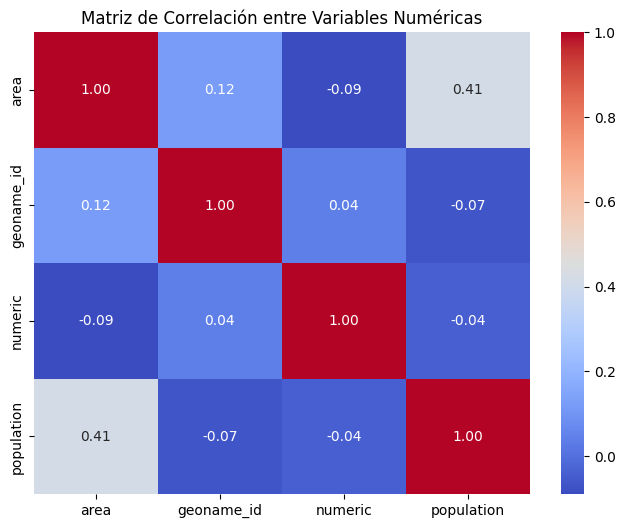

In [12]:
# Calcular la matriz de correlación
correlacion = dfc.corr(numeric_only=True)

# Mostrar la matriz en texto
print("Matriz de correlación:\n")
print(correlacion)

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()


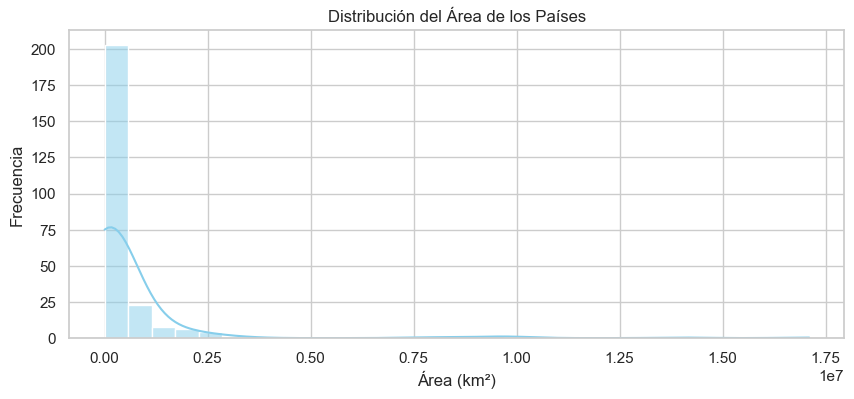

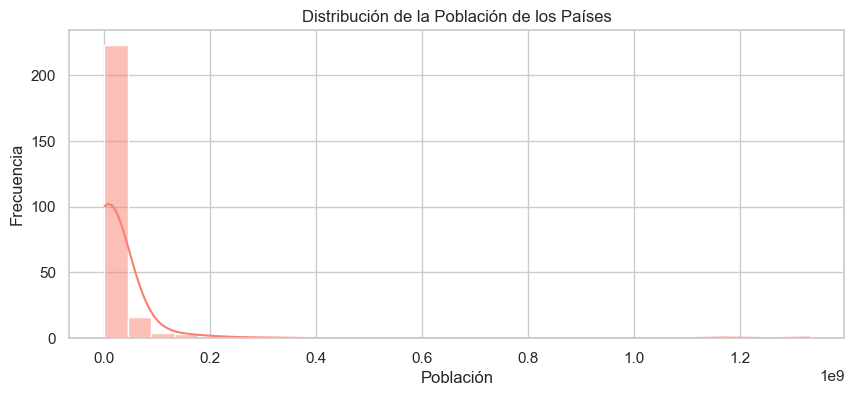

In [13]:

# Estilo general
sns.set_theme(style="whitegrid")

# Histograma de área
plt.figure(figsize=(10, 4))
sns.histplot(dfc['area'].dropna(), bins=30, kde=True, color="skyblue")
plt.title("Distribución del Área de los Países")
plt.xlabel("Área (km²)")
plt.ylabel("Frecuencia")
plt.show()

# Histograma de población
plt.figure(figsize=(10, 4))
sns.histplot(dfc['population'].dropna(), bins=30, kde=True, color="salmon")
plt.title("Distribución de la Población de los Países")
plt.xlabel("Población")
plt.ylabel("Frecuencia")
plt.show()


Text(0, 0.5, 'Población')

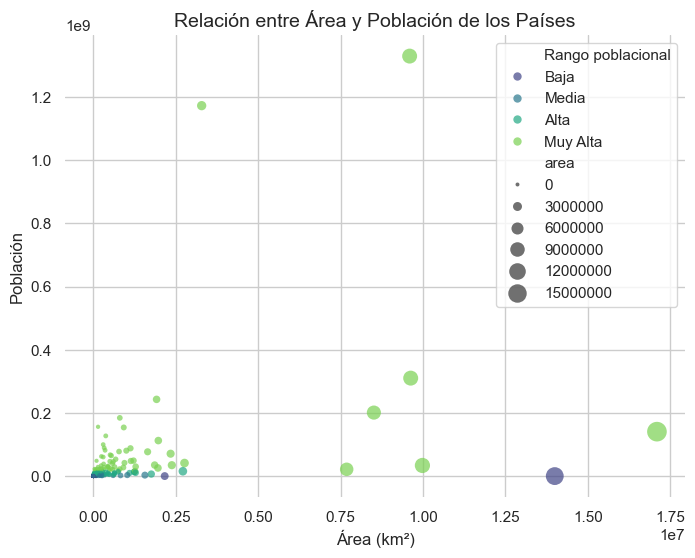

In [14]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(8, 6))
sns.despine(f, left=True, bottom=True)
dfc['Rango poblacional'] = pd.qcut(dfc['population'], q=4, labels=["Baja", "Media", "Alta", "Muy Alta"])

sns.scatterplot(x="area", y="population",
                hue="Rango poblacional", size="area",           
                palette="viridis",        
                sizes=(8, 200), linewidth=0,
                alpha=0.7,data=dfc,ax=ax                
)

ax.set_title("Relación entre Área y Población de los Países", fontsize=14)
ax.set_xlabel("Área (km²)", fontsize=12)
ax.set_ylabel("Población", fontsize=12)
